# Table of Contents
</br>
<div class="lev1">
	<a href="#The-dataset"><span class="toc-item-num">1&nbsp;&nbsp;</span>The dataset</a>
</div>
<div class="lev1">
	<a href="#My-plan"><span class="toc-item-num">2&nbsp;&nbsp;</span>My plan</a>
</div>
<div class="lev1">
    <a href="#Wrangle-and-Tidy-the-dataset"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wrangle and Tidy the dataset</a>
    <div class="lev2">
        <a href="#Load-the-Data"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load the Data</a>
    </div>
    <div class="lev2">
        <a href="#Profile-the-Data"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Profile the data</a>
    </div>
</div>
<div class="lev1">
    <a href="#Slicing-the-data"><span class="toc-item-num">4&nbsp;&nbsp;</span>Slicing the data</a>
</div>
    <div class="lev2">
        <a href="#Weather"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Weather</a>
    </div>
    <div class="lev2">
        <a href="#Location"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Location</a>
    </div>
    <div class="lev2">
        <a href="#Modalities"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Modalities</a>
    </div>
<div class="lev1">
    <a href="#ARIMA-Modelling"><span class="toc-item-num">5&nbsp;&nbsp;</span>ARIMA Modelling</a>
    <div class="lev2">
        <a href="#Check-if-the-data-is-stationary"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Check if the data is stationary</a>
    </div>
    <div class="lev2">
        <a href="#Make-the-data-stationary"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Make the data stationary</a>
    </div>
    <div class="lev2">
        <a href="#Estimate-and-Eliminate-Trends"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Estimate and Eliminate Trends</a>
    </div>
</div>
<div class="lev1">
	<a href="#Conclusion"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a>
</div>


In [1]:
%matplotlib inline
#%config InlineBackend.figure_format='retina'
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
import datetime as dtm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)
rcParams['figure.figsize'] = 15, 6

# The dataset

<img src="images/odot_logo.png" alt="ODOT" width="290" align="right">
These analyses utilize a dataset maintained and distributed by the [Oregon Department of Transportation](http://www.oregon.gov/odot/Pages/index.aspx). The data was retrieved with permission of an ODOT Crash Analyst as a part of the Hack Oregon Transportation project on [civicpdx.org](civicpdx.org). The data was collected from 2004 - 2015 and covers the entirety of Portland city limits. The data includes features such as crash incidences and causes, vehicle information, and participant information. The data was provided to Hack Oregon via an Access database. The relevant tables have been dumped and loaded as excel files into the data folder of this repository. As a final note, these notebooks were written using Python 3.

The goals of this Exploratory Data Analysis are as follows:
1. Wrangle and Tidy the dataset.
2. Understand any correlations and causations within the data.
3. Identify spatiotemporal trends within the data.

# My plan
To accomplish the goals described above, the following steps will be taken:

- Load the data into pandas dataframes
- Determine appropriate indices, relationships, and variables
- Profile the data using basic pandas methods such as head(), shape(), describe(), etc
- Slice the data geospatially, temporally, and by other intriguing variables
- Based on these findings, draw a hypothesis for further testing

# Wrangle and Tidy the dataset
## Load the Data

In [2]:
# The primary data sets come from 3 sources: Crashes and Participants. Ancillary tables are loaded below with explanations.
orig_time = dtm.datetime.now()
crash_rawdata = pd.read_excel('data/RAW_CRASH.xlsx')
participant_rawdata = pd.read_excel('data/RAW_PARTIC.xlsx')
print (dtm.datetime.now() - orig_time)

0:06:38.049044


In [3]:
# Investigate columns in datasets to select features
# start with crash data
#crash_rawdata.columns
#crash_rawdata['CRASH_DT'].dtypes # verifies the crash date is a datetime

#print(len(crash_rawdata.columns))
#crash_refined = crash_rawdata.dropna(axis=1, how='any')
#print(len(crash_refined.columns))
crash_refined = crash_rawdata[['CRASH_ID','CRASH_DT','CRASH_DAY_NO','CRASH_MO_NO','CRASH_YR_NO','AGY_ST_NO','ALCHL_INVLV_FLG','CITY_SECT_NM','CMPSS_DIR_CD','COLLIS_TYP_SHORT_DESC','CRASH_CAUSE_1_SHORT_DESC','CRASH_CAUSE_2_SHORT_DESC','CRASH_CAUSE_3_SHORT_DESC','CRASH_EVNT_1_SHORT_DESC','CRASH_EVNT_2_SHORT_DESC','CRASH_EVNT_3_SHORT_DESC','CRASH_HIT_RUN_FLG','CRASH_HR_NO','CRASH_HR_SHORT_DESC','CRASH_SPEED_INVLV_FLG','CRASH_SVRTY_SHORT_DESC','CRASH_TYP_SHORT_DESC','CRASH_WK_DAY_CD','DRUG_INVLV_FLG','DRVWY_REL_FLG','FC_SHORT_DESC','HWY_COMPNT_SHORT_DESC','HWY_MED_NM','HWY_NO','HWY_SFX_NO','IMPCT_LOC_CD','ISECT_AGY_ST_NO','ISECT_REL_FLG','ISECT_ST_FULL_NM','ISECT_TYP_SHORT_DESC','LANE_RDWY_DPRT_CRASH_FLG','LAT_DD','LGT_COND_SHORT_DESC','LN_QTY','LONGTD_DD','MEDN_TYP_SHORT_DESC','MP_NO','OFF_RDWY_FLG','POST_SPEED_LMT_VAL','RD_CHAR_SHORT_DESC','RD_CON_NO','RD_SURF_SHORT_DESC','RDWY_NO','RNDABT_FLG','RTE_ID','RTE_NM','SCHL_ZONE_IND','SER_NO','ST_FULL_NM','TOT_ALCHL_IMPAIRED_DRVR_INV_FATAL_CNT','TOT_DRVR_AGE_01_20_CNT','TOT_FATAL_CNT','TOT_INJ_CNT','TOT_INJ_LVL_A_CNT','TOT_INJ_LVL_B_CNT','TOT_INJ_LVL_C_CNT','TOT_MCYCLST_FATAL_CNT','TOT_MCYCLST_INJ_CNT','TOT_MCYCLST_INJ_LVL_A_CNT','TOT_MCYCLST_UNHELMTD_FATAL_CNT','TOT_OCCUP_CNT','TOT_PED_CNT','TOT_PED_FATAL_CNT','TOT_PED_INJ_CNT','TOT_PED_INJ_LVL_A_CNT','TOT_PEDCYCL_CNT','TOT_PEDCYCL_FATAL_CNT','TOT_PEDCYCL_INJ_CNT','TOT_PEDCYCL_INJ_LVL_A_CNT','TOT_PER_INVLV_CNT','TOT_PSNGR_VHCL_OCC_UNRESTRND_FATAL_CNT','TOT_SFTY_EQUIP_UNUSED_QTY','TOT_SFTY_EQUIP_USE_UNKNOWN_QTY','TOT_SFTY_EQUIP_USED_QTY','TOT_UNINJD_AGE00_04_CNT','TOT_UNINJD_PER_CNT','TOT_UNKNWN_CNT','TOT_UNKNWN_FATAL_CNT','TOT_UNKNWN_INJ_CNT','TOT_VHCL_CNT','TRAF_CNTL_DEVICE_SHORT_DESC','TURNG_LEG_QTY','WRK_ZONE_IND','WTHR_COND_SHORT_DESC']].copy()
#crash_refined.head()

# now the participant data
#participant_rawdata.columns
#participant_refined = participant_rawdata.dropna(axis=1, how='any')
participant_refined = participant_rawdata[['CRASH_ID','ACTN_SHORT_DESC','AGE_VAL','AIRBAG_DEPLOY_IND','ALCHL_USE_RPT_IND','BAC_VAL','DRUG_USE_RPT_IND','DRVR_LIC_STAT_SHORT_DESC','DRVR_RES_SHORT_DESC','INJ_SVRTY_SHORT_DESC','MVMNT_SHORT_DESC','NON_MOTRST_LOC_CD','PARTIC_CAUSE_1_SHORT_DESC','PARTIC_CAUSE_2_SHORT_DESC','PARTIC_CAUSE_3_SHORT_DESC','PARTIC_CMPSS_DIR_FROM_SHORT_DESC','PARTIC_CMPSS_DIR_TO_SHORT_DESC','PARTIC_DSPLY_SEQ_NO','PARTIC_ERR_1_SHORT_DESC','PARTIC_ERR_2_SHORT_DESC','PARTIC_ERR_3_SHORT_DESC','PARTIC_EVNT_1_SHORT_DESC','PARTIC_EVNT_2_SHORT_DESC','PARTIC_EVNT_3_SHORT_DESC','PARTIC_HIT_RUN_FLG','PARTIC_ID','PARTIC_TYP_CD','PARTIC_TYP_SHORT_DESC','PARTIC_VHCL_SEQ_NO','PUB_EMPL_FLG','SEX_CD','SFTY_EQUIP_USE_SHORT_DESC','STRIKG_PARTIC_FLG','VHCL_CODED_SEQ_NO','VHCL_ID']]
#participant_refined.head()

# Define Indices and Join Relationships
# CRASH -> PARTIC, CRASH_ID
crash_refined.set_index('CRASH_ID')
participant_refined.set_index('CRASH_ID')

crash_refined.head()
participant_refined.head()

,CRASH_ID,ACTN_SHORT_DESC,AGE_VAL,AIRBAG_DEPLOY_IND,ALCHL_USE_RPT_IND,BAC_VAL,DRUG_USE_RPT_IND,DRVR_LIC_STAT_SHORT_DESC,DRVR_RES_SHORT_DESC,INJ_SVRTY_SHORT_DESC,...,PARTIC_ID,PARTIC_TYP_CD,PARTIC_TYP_SHORT_DESC,PARTIC_VHCL_SEQ_NO,PUB_EMPL_FLG,SEX_CD,SFTY_EQUIP_USE_SHORT_DESC,STRIKG_PARTIC_FLG,VHCL_CODED_SEQ_NO,VHCL_ID
0,1096439,NONE,31,NaN,NaN,NaN,NaN,OR-Y,OR<25,NONE,...,2380870,1,DRVR,1,False,1,UNK,False,1.0,2078724.0
1,1096439,NONE,32,NaN,NaN,NaN,NaN,OR-Y,OR<25,INJC,...,2380871,1,DRVR,1,False,2,BELT,False,2.0,2078725.0
2,1096444,NONE,29,NaN,NaN,NaN,NaN,OR-Y,N-RES,NONE,...,2380882,1,DRVR,1,False,1,BELT,False,1.0,2078734.0
3,1096444,NONE,44,NaN,NaN,NaN,NaN,OR-Y,OR<25,INJC,...,2380883,1,DRVR,1,False,1,BELT,False,2.0,2078735.0
4,1096447,FATIGUE,35,NaN,NaN,NaN,NaN,OR-Y,OR<25,INJB,...,2380888,1,DRVR,1,False,1,BELT,False,1.0,2078740.0


In [4]:
# Create Analysis DataFrame from refined raw datasets
crash_participants = crash_refined.merge(participant_refined, how='inner', on='CRASH_ID')
crash_participants.head()

,CRASH_ID,CRASH_DT,CRASH_DAY_NO,CRASH_MO_NO,CRASH_YR_NO,AGY_ST_NO,ALCHL_INVLV_FLG,CITY_SECT_NM,CMPSS_DIR_CD,COLLIS_TYP_SHORT_DESC,...,PARTIC_ID,PARTIC_TYP_CD,PARTIC_TYP_SHORT_DESC,PARTIC_VHCL_SEQ_NO,PUB_EMPL_FLG,SEX_CD,SFTY_EQUIP_USE_SHORT_DESC,STRIKG_PARTIC_FLG,VHCL_CODED_SEQ_NO,VHCL_ID
0,1096439,2004-01-05,5,1,2004,02702,False,Portland SE,9,TURN,...,2380870,1,DRVR,1,False,1,UNK,False,1.0,2078724.0
1,1096439,2004-01-05,5,1,2004,02702,False,Portland SE,9,TURN,...,2380871,1,DRVR,1,False,2,BELT,False,2.0,2078725.0
2,1096444,2004-01-05,5,1,2004,02612,False,Portland SW,9,ANGL,...,2380882,1,DRVR,1,False,1,BELT,False,1.0,2078734.0
3,1096444,2004-01-05,5,1,2004,02612,False,Portland SW,9,ANGL,...,2380883,1,DRVR,1,False,1,BELT,False,2.0,2078735.0
4,1096447,2004-01-03,3,1,2004,09010,False,Portland Bridges,2,FIX,...,2380888,1,DRVR,1,False,1,BELT,False,1.0,2078740.0


## Profile the Data

In [5]:
print(crash_refined.shape) # Just the incidences
print(crash_participants.shape) # Incidences with a record per participant

(49762, 89)
(124691, 123)


In [6]:
crash_participants.columns.tolist()

['CRASH_ID',
 'CRASH_DT',
 'CRASH_DAY_NO',
 'CRASH_MO_NO',
 'CRASH_YR_NO',
 'AGY_ST_NO',
 'ALCHL_INVLV_FLG',
 'CITY_SECT_NM',
 'CMPSS_DIR_CD',
 'COLLIS_TYP_SHORT_DESC',
 'CRASH_CAUSE_1_SHORT_DESC',
 'CRASH_CAUSE_2_SHORT_DESC',
 'CRASH_CAUSE_3_SHORT_DESC',
 'CRASH_EVNT_1_SHORT_DESC',
 'CRASH_EVNT_2_SHORT_DESC',
 'CRASH_EVNT_3_SHORT_DESC',
 'CRASH_HIT_RUN_FLG',
 'CRASH_HR_NO',
 'CRASH_HR_SHORT_DESC',
 'CRASH_SPEED_INVLV_FLG',
 'CRASH_SVRTY_SHORT_DESC',
 'CRASH_TYP_SHORT_DESC',
 'CRASH_WK_DAY_CD',
 'DRUG_INVLV_FLG',
 'DRVWY_REL_FLG',
 'FC_SHORT_DESC',
 'HWY_COMPNT_SHORT_DESC',
 'HWY_MED_NM',
 'HWY_NO',
 'HWY_SFX_NO',
 'IMPCT_LOC_CD',
 'ISECT_AGY_ST_NO',
 'ISECT_REL_FLG',
 'ISECT_ST_FULL_NM',
 'ISECT_TYP_SHORT_DESC',
 'LANE_RDWY_DPRT_CRASH_FLG',
 'LAT_DD',
 'LGT_COND_SHORT_DESC',
 'LN_QTY',
 'LONGTD_DD',
 'MEDN_TYP_SHORT_DESC',
 'MP_NO',
 'OFF_RDWY_FLG',
 'POST_SPEED_LMT_VAL',
 'RD_CHAR_SHORT_DESC',
 'RD_CON_NO',
 'RD_SURF_SHORT_DESC',
 'RDWY_NO',
 'RNDABT_FLG',
 'RTE_ID',
 'RTE_NM',
 'SCH

In [7]:
# some interesting features
crash_participants[['CRASH_DT', 'TOT_FATAL_CNT', 'TOT_INJ_CNT', 'TOT_MCYCLST_FATAL_CNT', 'TOT_PED_CNT', 'TOT_PED_FATAL_CNT', 'TOT_PED_INJ_CNT', 'TOT_PEDCYCL_CNT', 'TOT_PEDCYCL_FATAL_CNT', 'TOT_PEDCYCL_INJ_CNT', 'CRASH_WK_DAY_CD', 'DRUG_INVLV_FLG', 'ALCHL_INVLV_FLG', 'CRASH_SVRTY_SHORT_DESC',  'WTHR_COND_SHORT_DESC']].describe()

,TOT_FATAL_CNT,TOT_INJ_CNT,TOT_MCYCLST_FATAL_CNT,TOT_PED_CNT,TOT_PED_FATAL_CNT,TOT_PED_INJ_CNT,TOT_PEDCYCL_CNT,TOT_PEDCYCL_FATAL_CNT,TOT_PEDCYCL_INJ_CNT,CRASH_WK_DAY_CD
count,124691.000000,124691.000000,124691.000000,124691.000000,124691.000000,124691.000000,124691.000000,124691.000000,124691.000000,124691.000000
mean,0.006047,1.641313,0.000674,0.041928,0.002053,0.039682,0.047116,0.000281,0.046635,4.169884
std,0.082828,1.099321,0.028027,0.216765,0.047003,0.208098,0.215380,0.016752,0.213916,1.891313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,2.000000,20.000000,2.000000,5.000000,2.000000,3.000000,3.000000,1.000000,3.000000,7.000000


Before moving on to slicing the data, I will now prepare a geolocation column to help group the data by location. The location of each incident is approximated by the two closest intersecting roads. Therefore, it makes sense to make this as a feature in the data.

In [8]:
crash_participants['INTERSECTION'] = crash_participants['ST_FULL_NM'] + " / " + crash_participants['ISECT_ST_FULL_NM']
crash_refined['INTERSECTION'] = crash_refined['ST_FULL_NM'] + " / " + crash_refined['ISECT_ST_FULL_NM']

# Slicing the data

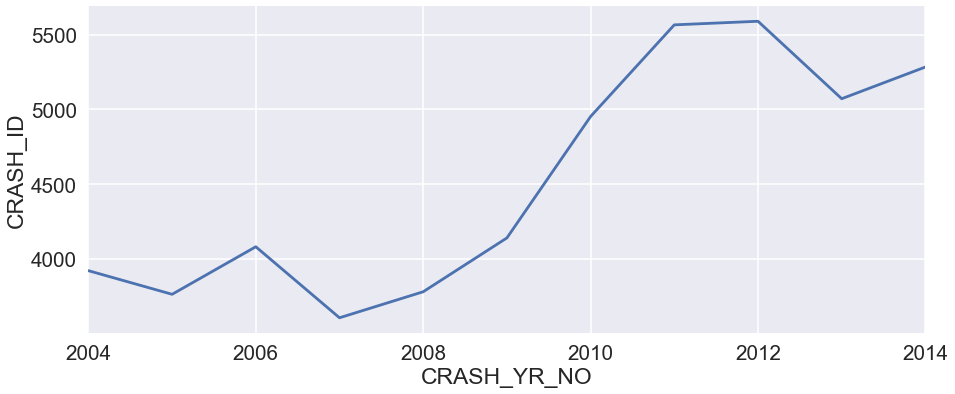

In [9]:
# Start by viewing the total incidences over time
tot_incidences = pd.DataFrame(crash_refined.groupby(['CRASH_YR_NO'])['CRASH_ID'].count()).reset_index()
tot_incidences['UNIT'] = 0 # needed for seaborn...
sns.tsplot(time='CRASH_YR_NO', value='CRASH_ID', unit='UNIT', data=tot_incidences)

The number of crashes increases over time. An interesting decrease occurred in 2013, but otherwise nothing looks extraordinary yet. Next, I'll take a deeper dive into other features.

### Weather

In [10]:
weather = pd.DataFrame(crash_refined.groupby(['WTHR_COND_SHORT_DESC'])['CRASH_ID'].count()).reset_index()
weather

,WTHR_COND_SHORT_DESC,CRASH_ID
0,ASH,2
1,CLD,2856
2,CLR,35751
3,DUST,1
4,FOG,236
5,RAIN,9718
6,SLT,41
7,SNOW,292
8,UNK,865


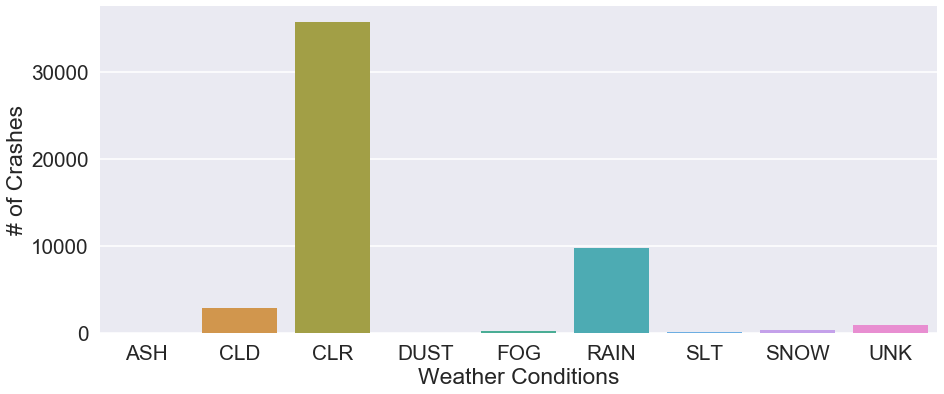

In [11]:
weather_plot = sns.barplot(x="WTHR_COND_SHORT_DESC", y='CRASH_ID', data=weather)
weather_plot.set(xlabel='Weather Conditions', ylabel='# of Crashes')
weather_plot

### Location

In [12]:
city_sections = pd.DataFrame(crash_refined.groupby('CITY_SECT_NM')['CRASH_ID'].count()).reset_index()
city_sections

,CITY_SECT_NM,CRASH_ID
0,Portland Bridges,718
1,Portland E. Burnside,833
2,Portland N,5165
3,Portland NE,14552
4,Portland NW,2094
5,Portland SE,18026
6,Portland SW,7798
7,Portland Unk.,44
8,Portland W. Burnside,532


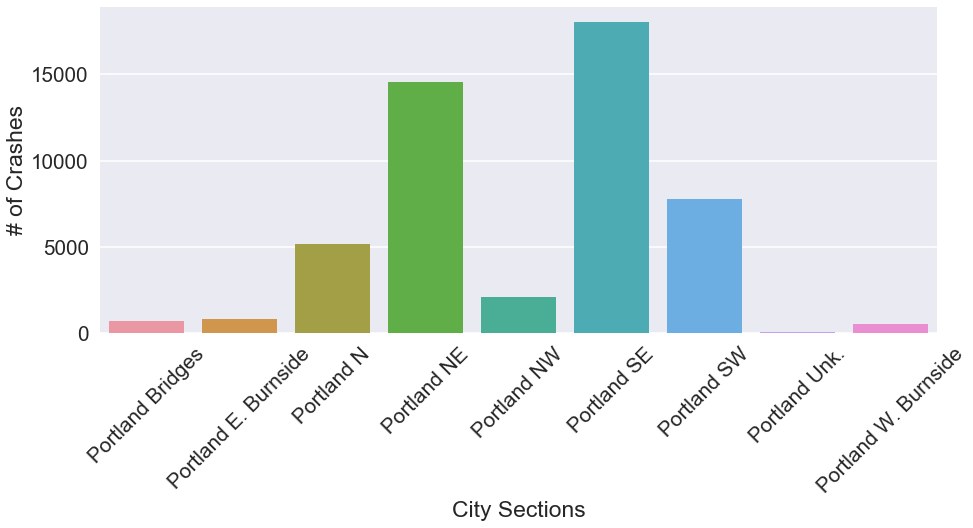

In [13]:
section_plot = sns.barplot(x='CITY_SECT_NM', y='CRASH_ID', data=city_sections)
plt.setp(section_plot.get_xticklabels(), rotation=45)
section_plot.set(xlabel='City Sections', ylabel='# of Crashes')
section_plot

I find it interesting that East Portland has so many more crashes than the West side. Even more striking is how many more incidences are occurring in South East Portland than in any other Region. Therefore, in the following analysis, I will drill into the location of the incidences more specifically.

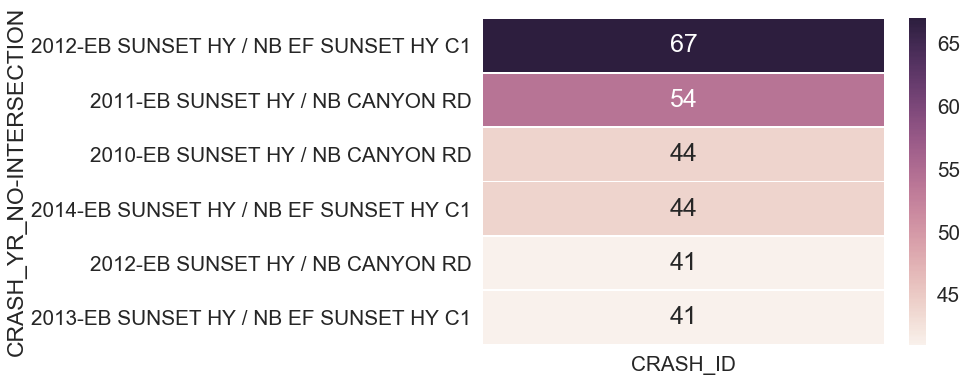

In [14]:
intersections = pd.DataFrame(crash_refined.groupby(['CRASH_YR_NO','INTERSECTION'])['CRASH_ID'].count())
intersections = intersections[intersections['CRASH_ID'] > 40].sort_values(by='CRASH_ID', ascending=False)
intersections.reset_index()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(intersections, annot=True, fmt="d", linewidths=.5, ax=ax)

### Modalities

In [15]:
total_fatalities = crash_refined['TOT_FATAL_CNT'].sum()
total_injuries = crash_refined['TOT_INJ_CNT'].sum()
total_pedestrian_fatalities = crash_refined['TOT_PED_FATAL_CNT'].sum()
total_bike_fatalities = crash_refined['TOT_PEDCYCL_FATAL_CNT'].sum()
total_mcycle_fatalities = crash_refined['TOT_MCYCLST_FATAL_CNT'].sum()
total_vehicles = crash_refined['TOT_VHCL_CNT'].sum()

mode_dict = {'Total Fatalities': total_fatalities, 'Total Injuries': total_injuries, 'Total Pedestrian Fatalities': total_pedestrian_fatalities, 
             'Total Bike Fatalities': total_bike_fatalities, 'Total Motorcycle Fatalities': total_mcycle_fatalities, 'Total Vehicles': total_vehicles}

modes = pd.DataFrame(pd.Series(mode_dict)).reset_index()
modes

,index,0
0,Total Bike Fatalities,17
1,Total Fatalities,329
2,Total Injuries,69838
3,Total Motorcycle Fatalities,47
4,Total Pedestrian Fatalities,105
5,Total Vehicles,100623


Based on these figures, I'm going to create a dataset of pedestrian fatalities and intersections that have had more than one for further analysis.

In [16]:
pedestrian_fatalities = crash_refined[crash_refined['TOT_PED_FATAL_CNT'] > 0]
repeat_offenders = pd.DataFrame(pedestrian_fatalities.groupby('INTERSECTION')['CRASH_ID'].count()).reset_index()
ro_crashes = crash_refined.merge(repeat_offenders, on='INTERSECTION', how='inner')
ro_crashes

,CRASH_ID_x,CRASH_DT,CRASH_DAY_NO,CRASH_MO_NO,CRASH_YR_NO,AGY_ST_NO,ALCHL_INVLV_FLG,CITY_SECT_NM,CMPSS_DIR_CD,COLLIS_TYP_SHORT_DESC,...,TOT_UNKNWN_CNT,TOT_UNKNWN_FATAL_CNT,TOT_UNKNWN_INJ_CNT,TOT_VHCL_CNT,TRAF_CNTL_DEVICE_SHORT_DESC,TURNG_LEG_QTY,WRK_ZONE_IND,WTHR_COND_SHORT_DESC,INTERSECTION,CRASH_ID_y
0,1096511,2004-01-01,1,1,2004,00745,False,Portland NE,2,FIX,...,0,0,0,2,ONE-WAY,NaN,NaN,SLT,EAST PORTLAND FY / SB EX SB COL BVD C2,1
1,1122374,2004-09-18,18,9,2004,00745,False,Portland NE,7,SS-O,...,0,0,0,2,UNKNOWN,NaN,NaN,CLR,EAST PORTLAND FY / SB EX SB COL BVD C2,1
2,1130526,2004-11-12,12,11,2004,00745,False,Portland NE,2,REAR,...,0,0,0,4,UNKNOWN,NaN,NaN,CLR,EAST PORTLAND FY / SB EX SB COL BVD C2,1
3,1174473,2005-10-25,25,10,2005,00745,False,Portland NE,1,REAR,...,0,0,0,2,UNKNOWN,NaN,NaN,RAIN,EAST PORTLAND FY / SB EX SB COL BVD C2,1
4,1208668,2006-08-07,7,8,2006,00745,False,Portland NE,2,SS-O,...,0,0,0,2,ONE-WAY,NaN,0.0,CLR,EAST PORTLAND FY / SB EX SB COL BVD C2,1
5,1209479,2006-08-08,8,8,2006,00745,False,Portland NE,2,REAR,...,0,0,0,2,UNKNOWN,NaN,NaN,CLR,EAST PORTLAND FY / SB EX SB COL BVD C2,1
6,1214496,2006-09-28,28,9,2006,00745,False,Portland NE,2,REAR,...,0,0,0,2,ONE-WAY,NaN,NaN,CLR,EAST PORTLAND FY / SB EX SB COL BVD C2,1
7,1215888,2006-10-11,11,10,2006,00745,False,Portland NE,2,REAR,...,0,0,0,2,ONE-WAY,NaN,0.0,CLR,EAST PORTLAND FY / SB EX SB COL BVD C2,1
8,1227888,2006-09-24,24,9,2006,00745,False,Portland NE,6,REAR,...,0,0,0,2,ONE-WAY,NaN,NaN,CLR,EAST PORTLAND FY / SB EX SB COL BVD C2,1
9,1243636,2007-05-15,15,5,2007,00745,False,Portland NE,2,FIX,...,0,0,0,1,UNKNOWN,NaN,0.0,CLR,EAST PORTLAND FY / SB EX SB COL BVD C2,1


# ARIMA Modelling

In [17]:
ro_crashes.index = ro_crashes.CRASH_DT
ro_crashes.index

DatetimeIndex(['2004-01-01', '2004-09-18', '2004-11-12', '2005-10-25',
               '2006-08-07', '2006-08-08', '2006-09-28', '2006-10-11',
               '2006-09-24', '2007-05-15',
               ...
               '2014-03-28', '2014-05-13', '2014-05-23', '2014-05-30',
               '2014-06-07', '2014-11-28', '2014-11-22', '2014-12-27',
               '2012-06-25', '2013-07-27'],
              dtype='datetime64[ns]', name='CRASH_DT', length=2135, freq=None)

In [18]:
ro_crashes['2009'].tail()

,CRASH_ID_x,CRASH_DT,CRASH_DAY_NO,CRASH_MO_NO,CRASH_YR_NO,AGY_ST_NO,ALCHL_INVLV_FLG,CITY_SECT_NM,CMPSS_DIR_CD,COLLIS_TYP_SHORT_DESC,...,TOT_UNKNWN_CNT,TOT_UNKNWN_FATAL_CNT,TOT_UNKNWN_INJ_CNT,TOT_VHCL_CNT,TRAF_CNTL_DEVICE_SHORT_DESC,TURNG_LEG_QTY,WRK_ZONE_IND,WTHR_COND_SHORT_DESC,INTERSECTION,CRASH_ID_y
CRASH_DT,,,,,,,,,,,,,,,,,,,,,
2009-10-31,1341010,2009-10-31,31,10,2009,00283,False,Portland E. Burnside,3,PED,...,0,0,0,1,NONE,0.0,0.0,CLR,E BURNSIDE ST / NE 22ND AVE,1
2009-05-19,1327938,2009-05-19,19,5,2009,02237,False,Portland NE,1,REAR,...,0,0,0,2,TRF SIGNAL,0.0,NaN,CLR,NE SKIDMORE ST / NE 122ND AVE,1
2009-06-20,1329147,2009-06-20,20,6,2009,02237,False,Portland NE,5,PED,...,0,0,0,1,TRF SIGNAL,0.0,0.0,CLD,NE SKIDMORE ST / NE 122ND AVE,1
2009-07-02,1333747,2009-07-02,2,7,2009,02903,False,Portland NW,3,REAR,...,0,0,0,2,NONE,NaN,0.0,CLR,NW ST HELENS RD / NW MARINA WAY,1
2009-11-04,1335770,2009-11-04,4,11,2009,02638,True,Portland N,8,PED,...,0,0,0,2,NONE,NaN,0.0,CLD,N WILLAMETTE BLVD / N HODGE AVE,1


## Check if the data is stationary

In [128]:
# The stationarity test from Analytics Vidhya
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=2)
    rolstd = pd.rolling_std(timeseries, window=2)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

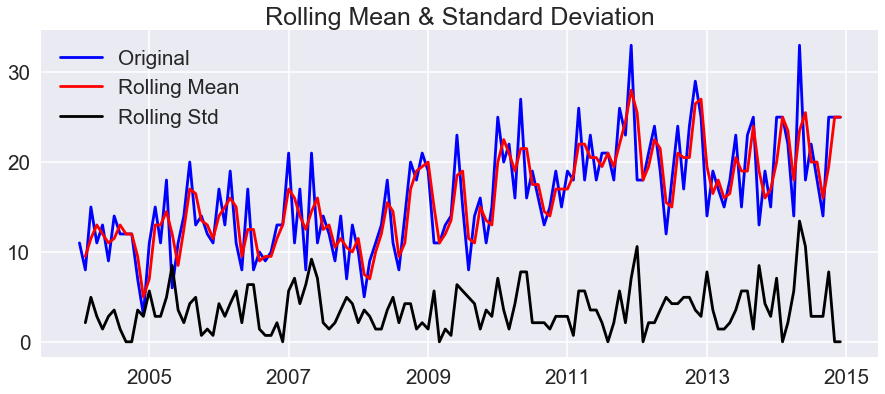

Results of Dickey-Fuller Test:
Test Statistic                  -2.182774
p-value                          0.212557
#Lags Used                       4.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


In [130]:
ro_crashes['FAKE_DAY'] = 1
ro_crashes['CRASH_GROUP_DT'] = pd.to_datetime(dict(year=ro_crashes.CRASH_YR_NO, month=ro_crashes.CRASH_MO_NO, day=ro_crashes.FAKE_DAY))#ro_crashes['CRASH_GROUP_DT']
crashes_over_time = ro_crashes.groupby(['CRASH_GROUP_DT'])['CRASH_ID_x'].count()
crashes_over_time
test_stationarity(crashes_over_time)

Both the mean and the standard deviation change over time, so this data must be transformed into a stationary form before analysis can continue.

## Make the data stationary

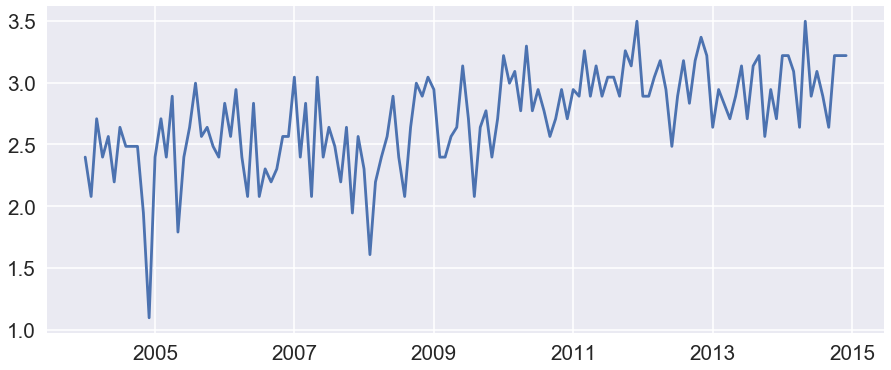

In [131]:
ts_log = np.log(crashes_over_time)
plt.plot(ts_log)

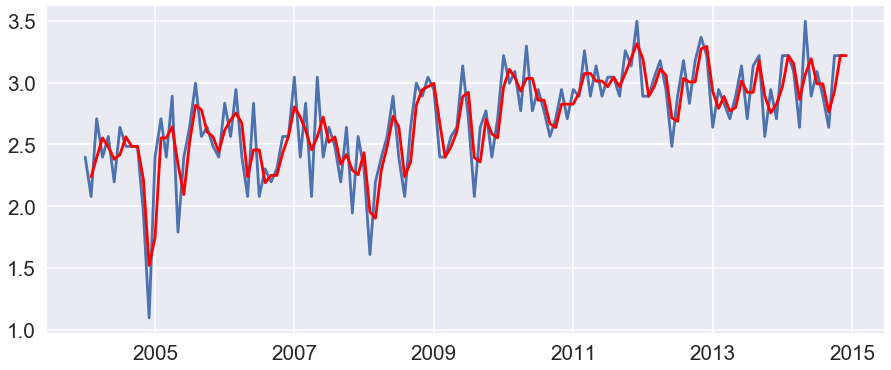

In [132]:
moving_avg = pd.rolling_mean(ts_log,2)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [133]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

CRASH_GROUP_DT
2004-01-01             NaN
2004-02-01   -1.592269e-01
2004-03-01    3.143043e-01
2004-04-01   -1.550775e-01
2004-05-01    8.352704e-02
2004-06-01   -1.838624e-01
2004-07-01    2.209164e-01
2004-08-01   -7.707534e-02
2004-09-01    4.440892e-16
2004-10-01    4.440892e-16
2004-11-01   -2.694983e-01
2004-12-01   -4.236489e-01
Name: CRASH_ID_x, dtype: float64

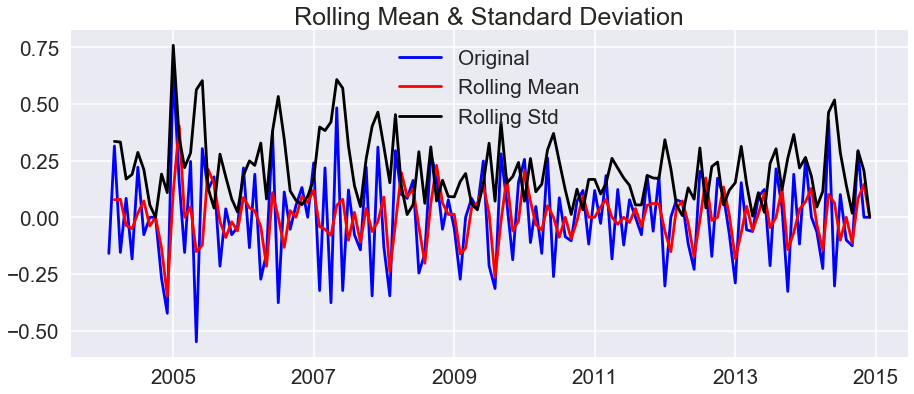

Results of Dickey-Fuller Test:
Test Statistic                -9.033253e+00
p-value                        5.373668e-15
#Lags Used                     4.000000e+00
Number of Observations Used    1.260000e+02
Critical Value (1%)           -3.483346e+00
Critical Value (5%)           -2.884766e+00
Critical Value (10%)          -2.579156e+00
dtype: float64


In [134]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

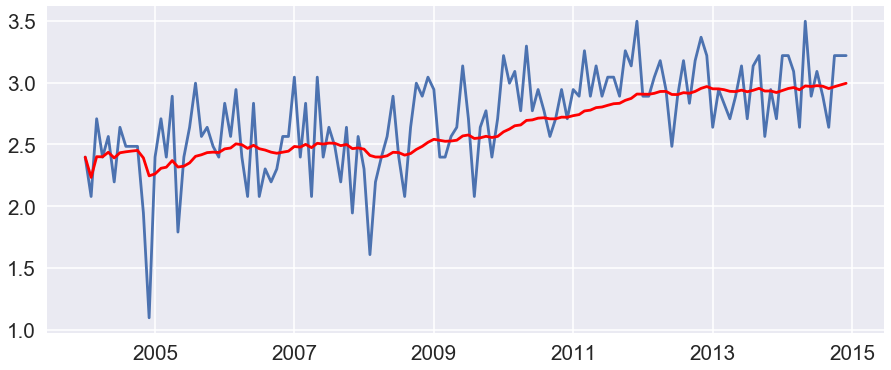

In [135]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

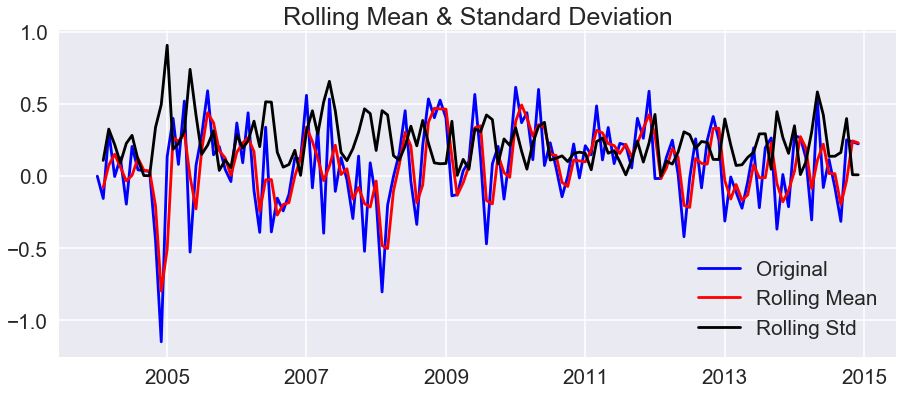

Results of Dickey-Fuller Test:
Test Statistic                -1.033150e+01
p-value                        2.834599e-18
#Lags Used                     0.000000e+00
Number of Observations Used    1.310000e+02
Critical Value (1%)           -3.481282e+00
Critical Value (5%)           -2.883868e+00
Critical Value (10%)          -2.578677e+00
dtype: float64


In [136]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Estimate and Eliminate Trends

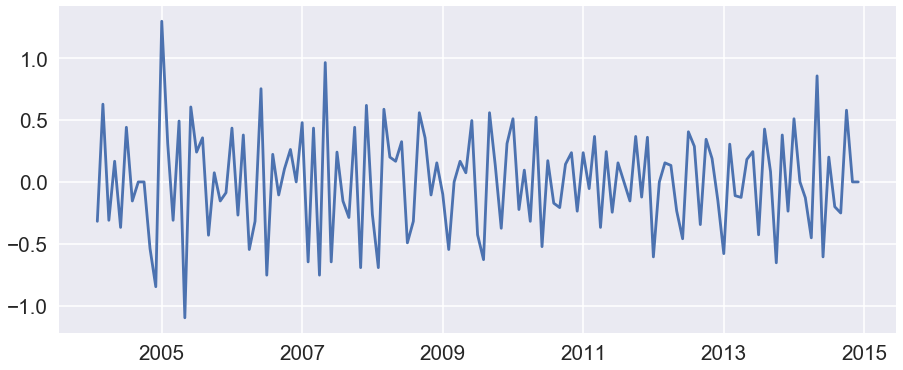

In [137]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

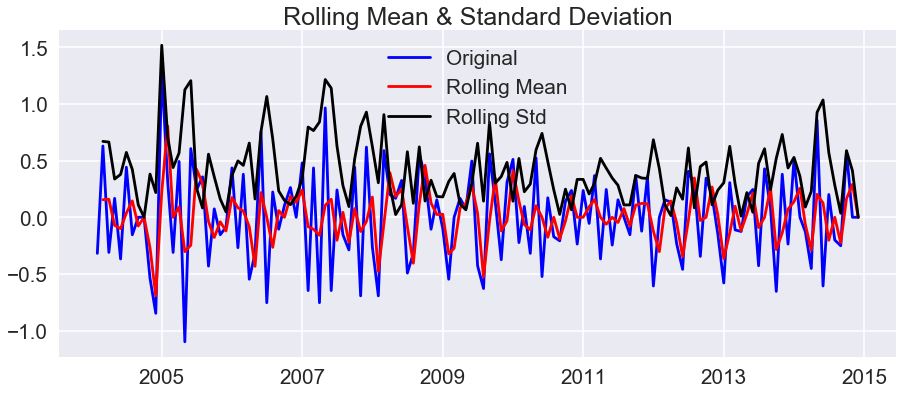

Results of Dickey-Fuller Test:
Test Statistic                -9.033253e+00
p-value                        5.373668e-15
#Lags Used                     4.000000e+00
Number of Observations Used    1.260000e+02
Critical Value (1%)           -3.483346e+00
Critical Value (5%)           -2.884766e+00
Critical Value (10%)          -2.579156e+00
dtype: float64


In [138]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [142]:
ts_log_df = pd.DataFrame(ts_log)
ts_log_df.reset_index(inplace=True)
ts_log_df = ts_log_df.set_index('CRASH_GROUP_DT')
ts_log_df.head()

,CRASH_ID_x
CRASH_GROUP_DT,
2004-01-01,2.397895
2004-02-01,2.079442
2004-03-01,2.708050
2004-04-01,2.397895
2004-05-01,2.564949


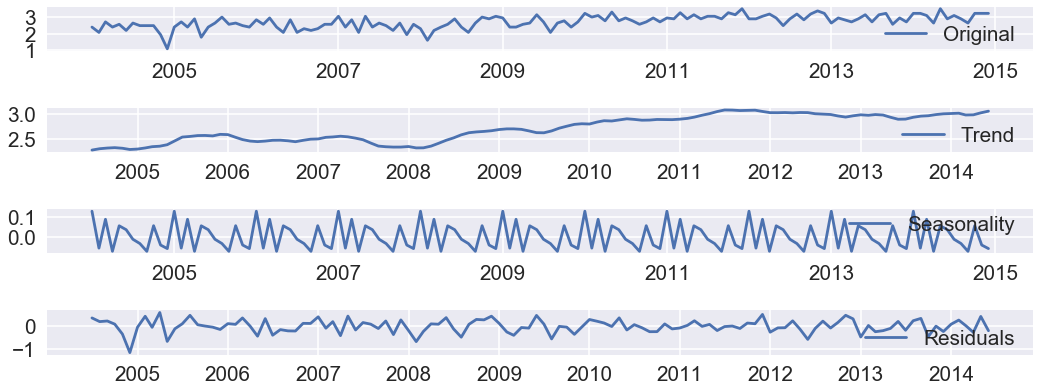

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

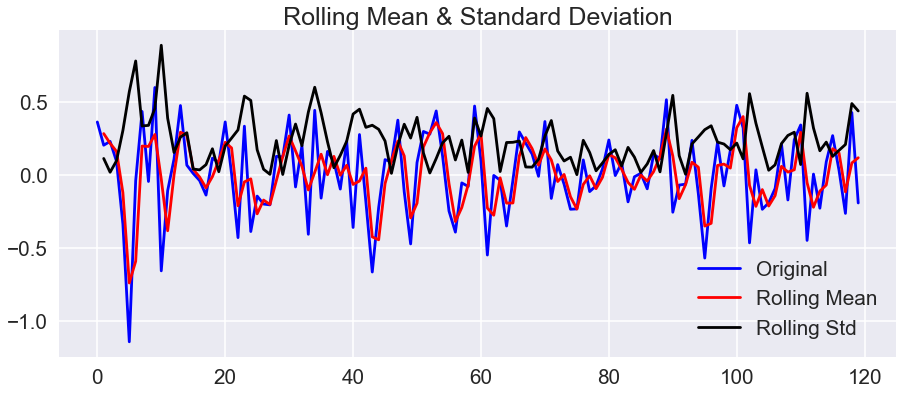

Results of Dickey-Fuller Test:
Test Statistic                -7.240736e+00
p-value                        1.887335e-10
#Lags Used                     4.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64


In [153]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose.iloc[:,0].values)

Now that this time series is stationary, a true ARIMA model can be created to aid in forecasting.

In [156]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

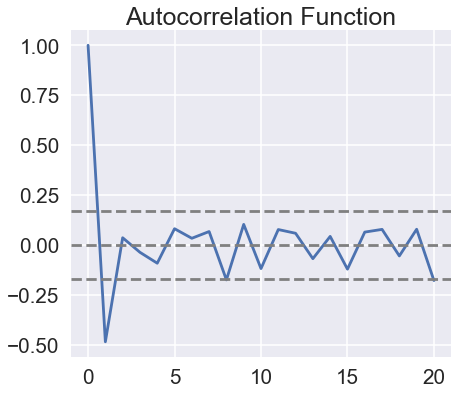

In [161]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

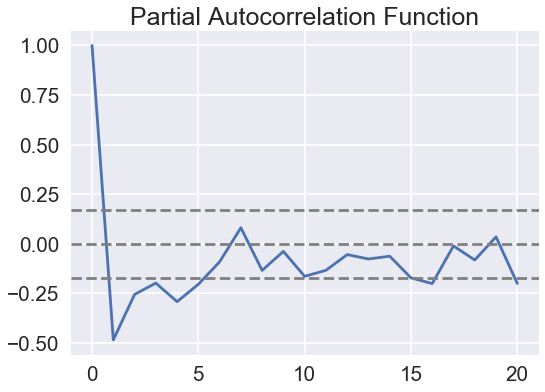

In [158]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From the ACF and PACF plots, we can deduce:

- p: 1
- q: 1

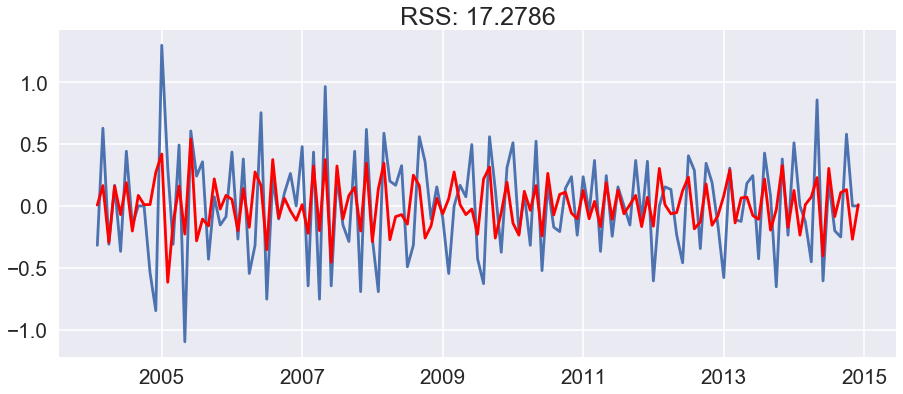

In [183]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [184]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

CRASH_GROUP_DT
2004-02-01    0.007094
2004-03-01    0.164381
2004-04-01   -0.293188
2004-05-01    0.160372
2004-06-01   -0.070190
dtype: float64

In [185]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

CRASH_GROUP_DT
2004-02-01    0.007094
2004-03-01    0.171476
2004-04-01   -0.121713
2004-05-01    0.038659
2004-06-01   -0.031530
dtype: float64

In [186]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

CRASH_GROUP_DT
2004-01-01    2.397895
2004-02-01    2.404989
2004-03-01    2.569371
2004-04-01    2.276183
2004-05-01    2.436555
dtype: float64

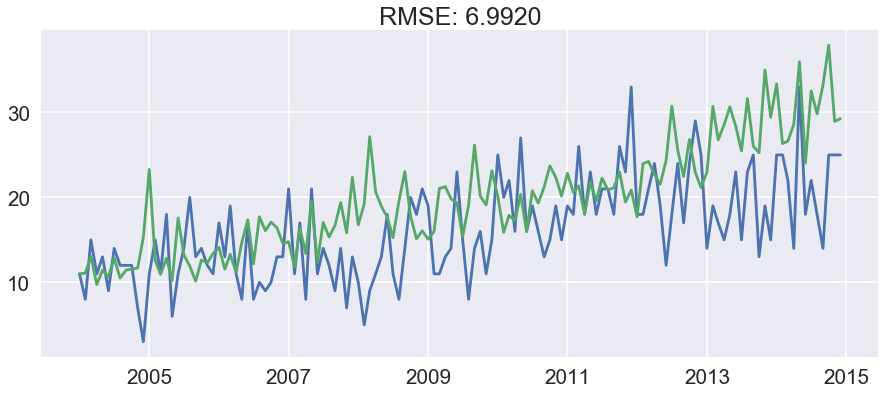

In [188]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(crashes_over_time)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-crashes_over_time)**2)/len(crashes_over_time)))

# Conclusion
The above analysis accomplished many things:
1. Wrangled and Tidied data from the wild.
2. Investigated statistical bumps in certain features of the data.
3. Identified some spatiotemporal trends within the data.
4. Prepared an ARIMA model that can be used for a deeper analysis.

While nothing definitive has been discovered from this analysis, a groundwork has been laid to model features within the data. The next steps would be to change out features in the ARIMA model to see if anything can be predicted. Additionally, the current ARIMA model based on crashes over time can definitely be perfected.